In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
%matplotlib inline

#import mnist data from keras
from tensorflow.keras.datasets import mnist


In [2]:
#keras stores mnist data as a tuple already split into train and test sets
#loading the data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print("Shape of training set >", x_train.shape)
print("Shape of test set > ", x_test.shape,"\n")


Shape of training set > (60000, 28, 28)
Shape of test set >  (10000, 28, 28) 



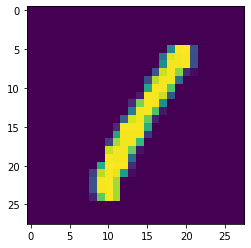

In [4]:
#Viewing a random image
random_image = x_train[3]
plt.imshow(random_image)

In [5]:
#checking on the labels
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
# One hot encoding our labels as we have 10 classes
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)


In [7]:
# normalizing our data
x_train,x_test = x_train/255 , x_test/255

In [8]:
# Confirming that our pixel values are between 0 and 1
scaled_image = x_train[0]
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
# Reshaping the image,this is so as to include the number of color channels
# batch_size,width,height,color_channels
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [10]:
#building our model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))

#output layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=1)
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1398 - accuracy: 0.9585 - val_loss: 0.0518 - val_accuracy: 0.9814

In [12]:
#Evaluating our model
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.139764,0.958467,0.051791,0.9814
1,0.047576,0.984883,0.050701,0.9823
2,0.032102,0.989367,0.039577,0.9869
3,0.020424,0.993650,0.035979,0.9894
4,0.014425,0.995333,0.045011,0.9866


<AxesSubplot:>

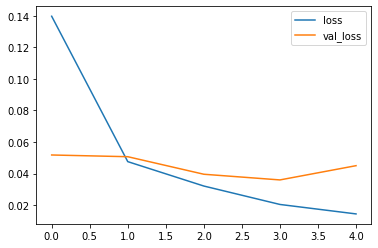

In [13]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

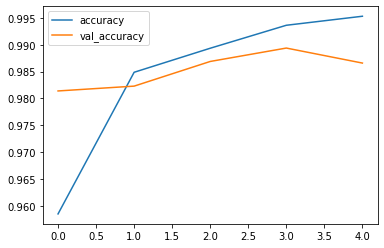

In [14]:
metrics[['accuracy','val_accuracy']].plot()


In [16]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg    

In [17]:
#print single image
model.predict_classes(x_test[0].reshape(1,28,28,1))

array([7])